In [1]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt

from timeit import default_timer as timer
from LoadData import LoadData
from sklearn.metrics import  plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import parallel_backend


TESTING = True
DECISION_TREE = False
SUPPORT_VECTOR = True
NEURAL_NET = False
K_NEAREST = False
BOOSTING = False
NORMALIZE_DATA = False
USE_PCA = True
DataSetName = "Fashion-MNIST"


In [ ]:
cwd = pathlib.Path().absolute()
if DataSetName == "MNIST":
    training_data_path = "{}/mnist-train-data.csv".format(cwd)
    testing_data_path = "{}/mnist-test-data.csv".format(cwd)
else:
    training_data_path = "{}/fashion-mnist-train-data.csv".format(cwd)
    testing_data_path = "{}/fashion-mnist-test-data.csv".format(cwd)

with parallel_backend('threading'):
    training_labels, training_data, _ = LoadData(training_data_path, normalize=NORMALIZE_DATA)
    testing_labels, testing_data, _ = LoadData(testing_data_path, normalize=NORMALIZE_DATA)

Scaler = StandardScaler().fit(training_data)
        
training_data = Scaler.transform(training_data)
testing_data = Scaler.transform(testing_data)

In [ ]:
"""
TRAINING TIME

"""

In [ ]:
classifier_list = []
knn_runtime = [0.0]
knn_accuracy = [0.0]

In [ ]:
with parallel_backend('threading'):
    for i in range(1, 51, 1):
        clf = KNeighborsClassifier(n_neighbors=i)
        print("{} - Training Size: {}%".format("KNN", (i * 10)))
        start_time = timer()
        with parallel_backend('threading'):
            clf.fit(training_data[:int((60000 * (0.05))), :], training_labels[:int((60000 * (0.05)))])
        end_time = timer()
        elapsed_time = end_time - start_time
        if i == 10:
            classifier_list.append(clf)
        print(elapsed_time)
        knn_accuracy.append(clf.score(testing_data[:2000, :], testing_labels[:2000]))
        knn_runtime.append(elapsed_time)

In [ ]:
knn_accuracy = np.asarray(knn_accuracy)
knn_runtime = np.asarray(knn_runtime)
print(knn_accuracy)

In [ ]:
knn_accuracy.tofile('knn_k_value_accuracy_{}.csv'.format(DataSetName),sep=',',format='%.3f')
knn_runtime.tofile('knn_k_value_runtime_{}.csv'.format(DataSetName),sep=',',format='%.3f')

In [ ]:
"""
Results

"""

In [2]:
cwd = pathlib.Path().absolute()


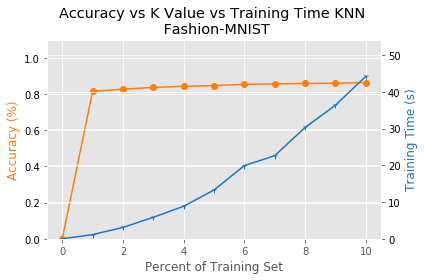

In [6]:
colors = ["tab:orange", "tab:blue", "tab:green", "tab:red"]

run = np.loadtxt("{}/knn_runtime_Fashion-MNIST.csv".format(cwd), delimiter=",")
acc = np.loadtxt("{}/knn_accuracy_Fashion-MNIST.csv".format(cwd), delimiter=",")


with plt.style.context('ggplot'):
    fig0, ax0 = plt.subplots()
    ax0.set_xlabel("Percent of Training Set")
    ax0.set_ylabel("Accuracy (%)", color='tab:orange')
    ax0.set_title("Accuracy vs K Value vs Training Time {} \n {}".format("KNN", DataSetName))
    ax0.tick_params(axis='y', labelcolor="black")
    ax0.set_ylim(0, 1.1)
    ax3 = ax0.twinx()
    ax3.set_ylabel("Training Time (s)", color="tab:blue")
    ax3.set_ylim(0, max(run) + 10)
    ax3.tick_params(axis='y', labelcolor="black")
    for i in range(1):        
        ax0.plot([i for i in range(11)], acc, colors[i], marker='o', label="KNN Accuracy")
        ax3.plot([i for i in range(11)], run, colors[i+1], marker="1", label="{} training-time".format("KNN"))
    fig0.tight_layout()
    directory = "{}/Training_{}_{}_vs_Training_Time.png".format(cwd, "KNN", DataSetName)
    plt.savefig(directory)